# **Importing Libraries**

In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("tensorflow version: ",tf.__version__)

2023-05-30 17:06:02.818304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tensorflow version:  2.11.0


# Exploring Dataset

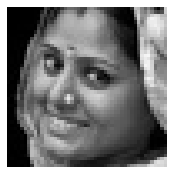

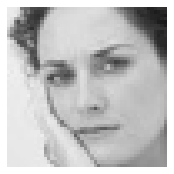

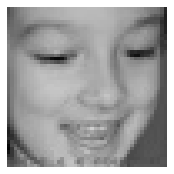

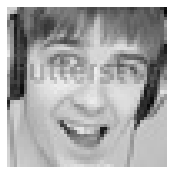

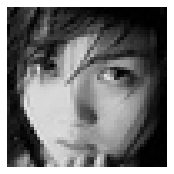

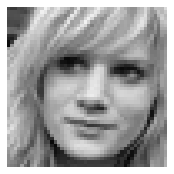

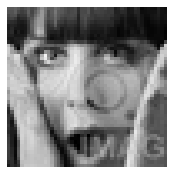

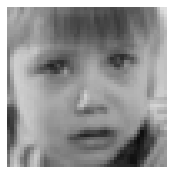

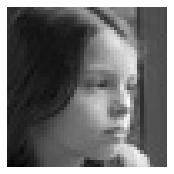

In [5]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(10,10))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis("off")

# Preparing Data for Training

In [6]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Defining Model

In [7]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [8]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [9]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [10]:
model = model_fer((48,48,1))
model.summary()

2023-05-30 17:07:54.425640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

# Initializing the Model

In [11]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

# Traning the Model

In [12]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
  1/448 [..............................] - ETA: 19:22 - loss: 2.4787 - accuracy: 0.0938

2023-05-30 17:23:07.963909: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 27648000 exceeds 10% of free system memory.
2023-05-30 17:23:08.272240: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 27648000 exceeds 10% of free system memory.


  3/448 [..............................] - ETA: 3:14 - loss: 2.2821 - accuracy: 0.1667

2023-05-30 17:23:08.806726: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 27648000 exceeds 10% of free system memory.


  4/448 [..............................] - ETA: 2:54 - loss: 2.3976 - accuracy: 0.1523

2023-05-30 17:23:09.161740: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 27648000 exceeds 10% of free system memory.


  5/448 [..............................] - ETA: 2:51 - loss: 2.3452 - accuracy: 0.1594

2023-05-30 17:23:09.483882: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 27648000 exceeds 10% of free system memory.


448/448 [==============================] - ETA: 0s - loss: 1.6702 - accuracy: 0.3651
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 178s 392ms/step - loss: 1.6702 - accuracy: 0.3651 - val_loss: 1.7484 - val_accuracy: 0.3623
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.4684
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 173s 385ms/step - loss: 1.3853 - accuracy: 0.4684 - val_loss: 1.6913 - val_accuracy: 0.4054
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2658 - accuracy: 0.5166
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 158s 352ms/step - loss: 1.2658 - accuracy: 0.5166 - val_loss: 1.3191 - val_accuracy: 0.4905
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.1967 - accuracy: 0.5463
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 137s 305ms/

# Model Evaluation

In [13]:
model.evaluate(validation_generator)

113/113 [==============================] - 11s 96ms/step - loss: 1.0965 - accuracy: 0.6059


[1.0965274572372437, 0.6058790683746338]

# Plotting Loss

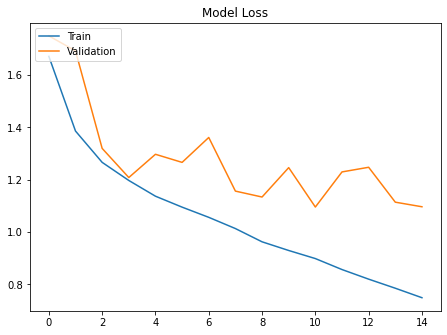

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

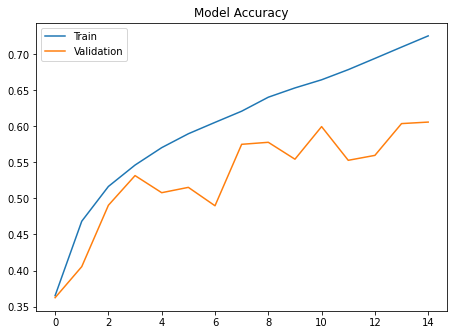

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

# Saving Model

In [16]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)